In [1]:
from source.helperfunctions import *

In [2]:
# read the relevant data
data_path = ['./data/BdXdata/', './data/Solcastdata/','./data/valvedata/']
date_column_name = ['Date', 'PeriodEnd','Time']
date_format = ['%m/%d/%Y %H:%M', '%Y-%m-%dT%H:%M:%SZ', None]
outlier_names = [['AirFlow', 'CCT_STP', 'CC_T', 'OAT', 'PHT_STP', 'PH_T.'], [], []]
time_offsets = [0, 0, 0]
metasys = [False, False, True]

# Create the data frame
df = createdataframe(data_path, date_column_name, date_format, outlier_names, time_offsets, metasys)

In [3]:
df.drop(columns=['AirTemp','DewpointTemp'],inplace=True)

In [4]:
df.head()

,AirFlow,CCT_STP,CC_T,OAT,PHT_STP,PH_T.,SAT,SAT_STP,RelativeHumidity,Chilled Water Valve Ouptut.Chilled Water Valve Ouptut.Trend - Present Value (),Preheat Output.Preheat Output.Trend - Present Value (),Reheat Output.Reheat Output.Trend - Present Value ()
Dates,,,,,,,,,,,,
2018-08-22 10:30:00,2530.3303,53.0,52.949505,80.456480,73.0,77.985558,65.190090,65.0,88.6,86.5673,0,0
2018-08-22 10:35:00,2526.7030,53.0,52.949505,81.169540,73.0,78.585236,65.487595,65.0,88.7,89.8747,0,0
2018-08-22 10:40:00,2527.2578,53.0,53.253326,81.494560,73.0,78.254623,65.787994,65.0,88.8,94.5044,0,0
2018-08-22 10:45:00,2518.1140,53.0,53.253326,80.380455,73.0,77.935196,65.490700,65.0,88.8,98.7527,0,0
2018-08-22 10:50:00,2535.0142,53.0,53.253326,80.687110,73.0,77.960747,65.490700,65.0,88.9,99.8656,0,0


In [21]:
# data inspection
def datainspect(df):
    from matplotlib import pyplot as plt
    plt.rcParams["figure.figsize"] = (20,30)
    fig,ax = plt.subplots(df.shape[1],1)
    for i,j in zip(df.columns,range(df.shape[1])):
        df.plot(y=[i],ax=ax[j],style=['b--'])

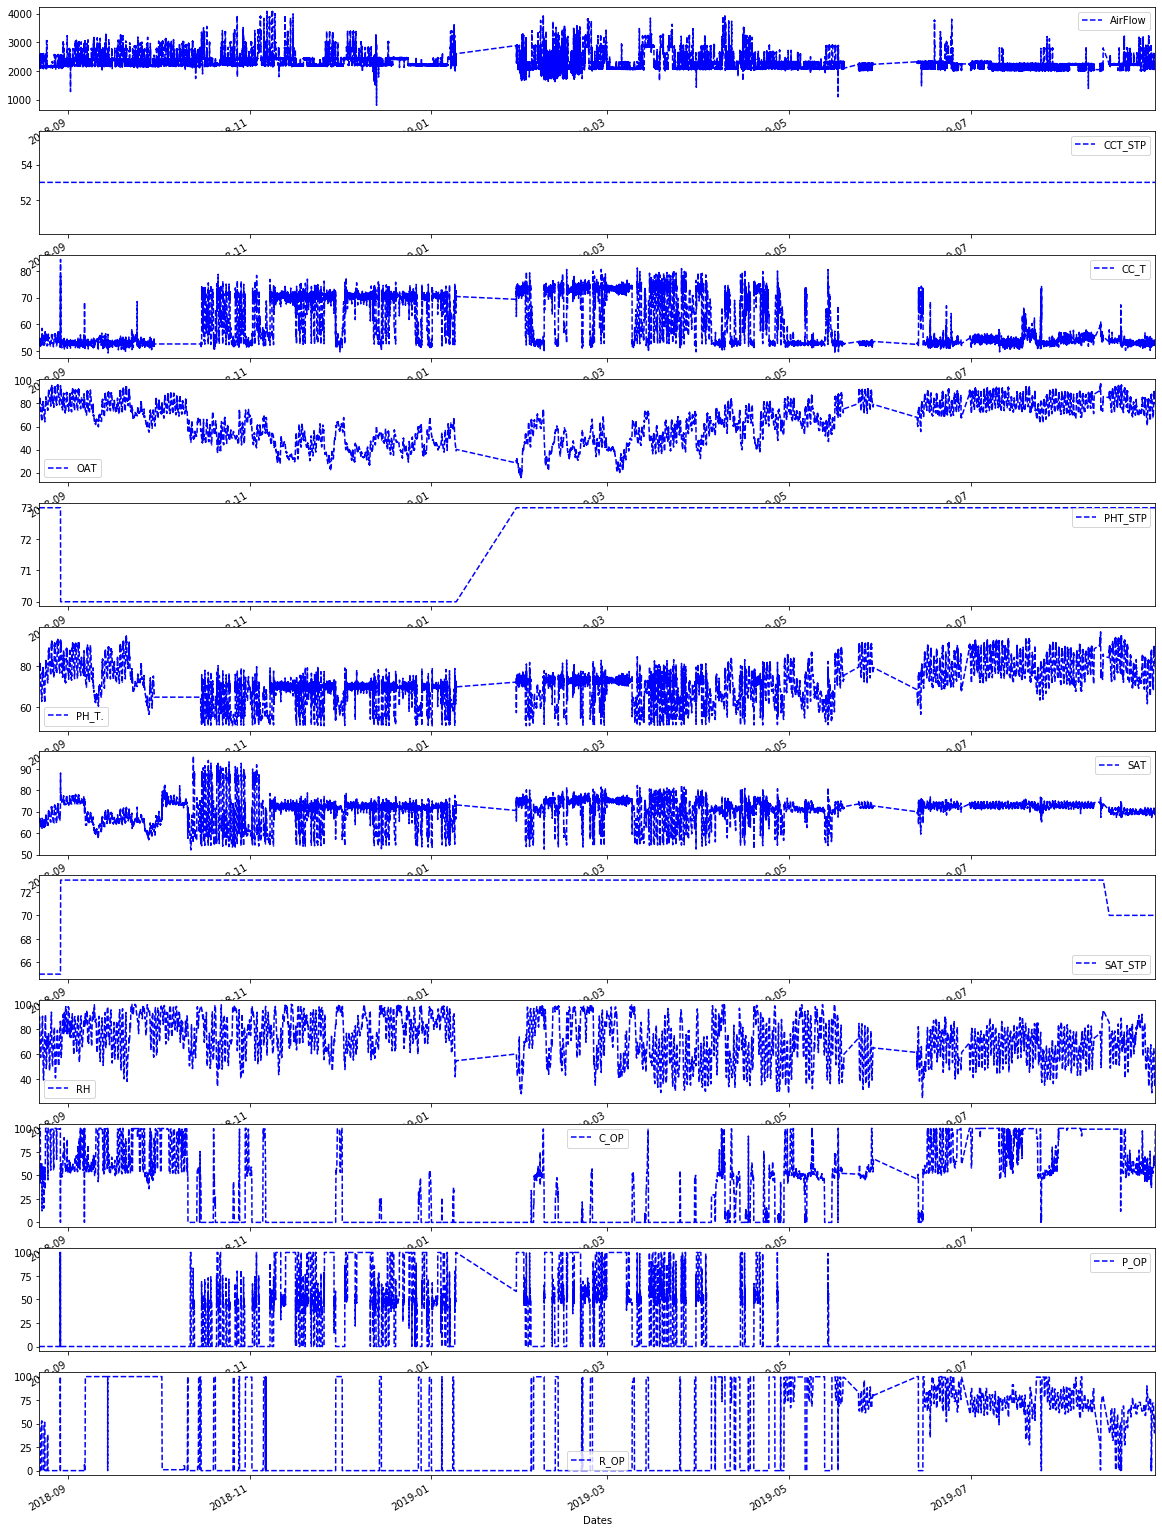

In [25]:
datainspect(df)

In [27]:
# to learn jacket exit temperature
df_coolonly = df[(df['C_OP']>0) & (df['P_OP']==0) & (df['R_OP']==0)]

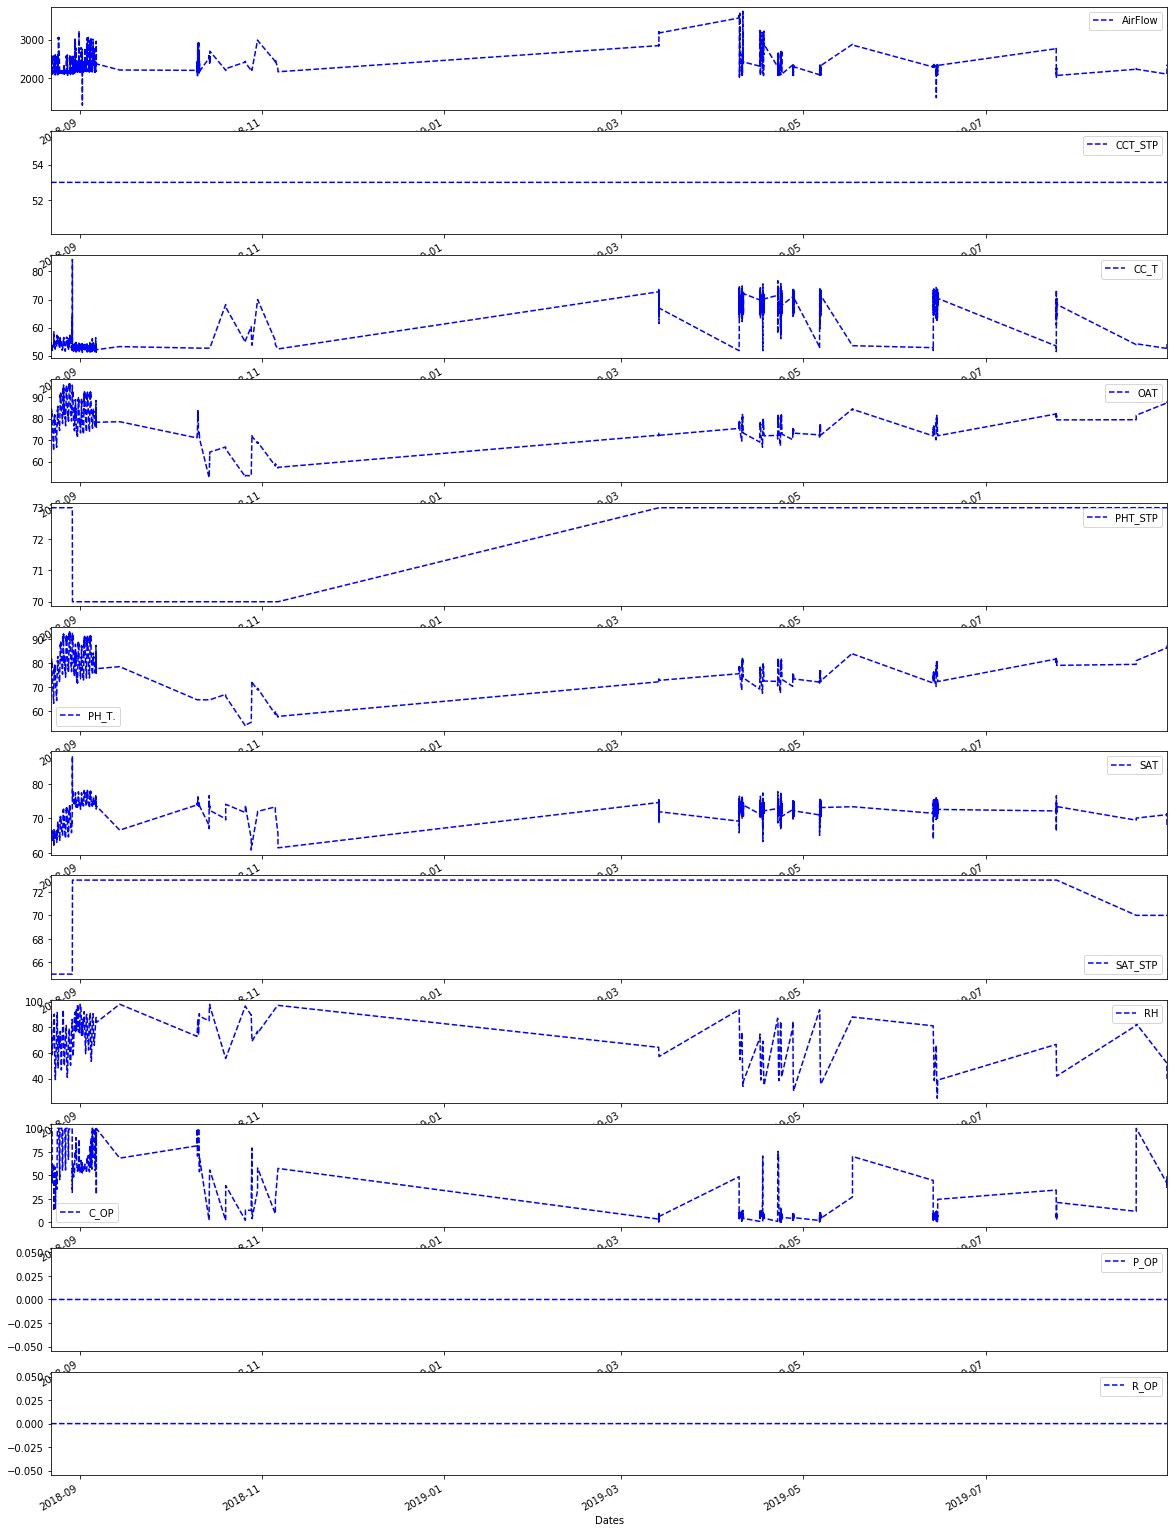

In [28]:
datainspect(df_coolonly)